<b><font size=20, color='#A020F0'>Homework 3</font></b>

#### In this homework you'll further explore xarray by working with atmospheric data from ERA5 reanalysis. 
You'll also get a chance to put together some nicer figures and work more with cartopy!

<b><font color='red'>Due Date: 23 October 2024</font></b><br>(by the beginning of class)

<b>How you will turn in this assignment</b><br> When you are ready to turn in your homework, do the following steps:
1. Execute all cells in your notebook so that the results are visible, and save one more time. It is ok if you have code that you practiced with, but <b><u>make sure your final answers to each question are clearly marked so that your TA and I know what to grade</u></b>. (You can also collapse the code and outputs that you _don't_ want us to grade; options to collapse and expand code are in the 'View' menu in the upper left)
2. Open a terminal and navigate to your local `aos573_completed_assignments` repository and make a new directory called `completed_HW3`
3. Move your completed jupyter notebook (<u>and _only_ your notebook</u>) into this directory
4. `add` and `commit` the `completed_HW3` directory and its contents to your local `aos573_completed_assignments` repository
5. `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)
6. <b><font color='red'>REMINDER: DO NOT TRACK OR PUSH THE DATA USED IN THE NOTEBOOK</font></b>


<b>Some Acknowledgements:</b>
Thanks to R. Abernathey's Research Computing class for inspiration for one of the problems in this assignment and Haochang Luo for initially downloading the ERA5 data that was subsequently adapted for this assignment.

---

## Part 1: Reading in and exploring the data
The data we'll be using for this homework is from [ERA5 reanalysis](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5). We'll be using the following gridded (netcdf) atmospheric fields:

1. Air temperature
2. Geopotential Height (at 500 mb only)
3. Zonal (u) and meridional (v) velocity
4. Mean Sea Level Pressure (MSLP)

The data are located in our shared directory on our jupyterhub: `/share/Homework_data/HW3_data/`<br>

### Q1.1 Load the data and combine it
Use xarray to read in each of the four datasets and combine them so that you have one dataset with all four variables. This combined dataset is what you will use for this assignment. 
> <font color='green'><b>Hint:</b></font> Check out [merge()](http://xarray.pydata.org/en/stable/user-guide/combining.html)

In [4]:
import xarray as xr
from xarray import DataArray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [5]:
data1=xr.open_dataset('share/Homework_data/HW3_data/ERA5.mean.T.1979-2020.nc')
data2=xr.open_dataset('share/Homework_data/HW3_data/ERA5.mean.U.1979-2020.nc')
data3=xr.open_dataset('share/Homework_data/HW3_data/ERA5.mean.V.1979-2020.nc')
data4=xr.open_dataset('share/Homework_data/HW3_data/ERA5.mon.500mb.Z.197901-201912.nc')
data5=xr.open_dataset('share/Homework_data/HW3_data/ERA5.mon.MSLP.197901-201912.nc')

In [6]:
data = xr.merge([data1, data2, data3, data4, data5])
data

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, level: 32, time: 492)
Coordinates:
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * level      (level) int32 10 20 30 50 70 100 125 ... 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    t          (level, latitude, longitude) float32 ...
    u          (level, latitude, longitude) float32 ...
    v          (level, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-29 21:15:12 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
    Description:  ERA5 air temperature averaged between 1979 and 2020 on a 1x...

### Q1.2 Get some basic information about your dataset

#### Q1.2.1 What dates does the time dimension span?

In [7]:
print(data.time.min())
print(data.time.max())

<xarray.DataArray 'time' ()>
array('1979-01-01T00:00:00.000000000', dtype='datetime64[ns]')
<xarray.DataArray 'time' ()>
array('2019-12-01T00:00:00.000000000', dtype='datetime64[ns]')


The data spans from January 1979 to December 2019.

#### Q1.2.2 What are the units of each of the data variables?

- t = Kelvin
- u = m/s
- v = m/s
- z = m^2/s^2
- msl = pascals

#### Q1.2.3 What are the dimensions of each of the data variables?
Here I want two things:
1. The names of the dimensions for each variable
2. The sizes of those dimensions (i.e., the shape of each data variable)

1. t, u, and v all have named dimensions level, latitude, and longitude. z and msl have named dimensions time, latitude, and longitude.

In [8]:
print(data.t.shape)
print(data.u.shape)
print(data.v.shape)
print(data.z.shape)
print(data.msl.shape)

(32, 181, 360)
(32, 181, 360)
(32, 181, 360)
(492, 181, 360)
(492, 181, 360)


#### Q1.2.4 What is the first value of latitude in the dataset? What is the last?

In [9]:
print(data.latitude.values[0])
print(data.latitude.values[-1])

90.0
-90.0


### Q1.3 Doing some conversions

#### Q1.3.1 Convert the 2m air temperature to ˚C and the MSLP to hPa. 
Keep the original attributes of each variable by using [set_options()](http://xarray.pydata.org/en/stable/generated/xarray.set_options.html), but <b>change the units attribute</b> once you do the conversion.

><font color='blue'><b>Note:</b></font> For your own reference, here are a couple of nice packages for easily handling unit conversions that are not currently in our environment: [cf_units](https://pypi.org/project/cf-units/) and [pint](https://pint.readthedocs.io/en/stable/)

In [10]:
with xr.set_options(keep_attrs=True): 
     data = data.assign(t = data.t-273, msl = data.msl/100)

In [11]:
data.t.attrs['units'] = '˚C'
data.msl.attrs['units'] = 'hPa'

#### Q1.3.2 Create a new data variable in your dataset for geopotential height
Geopotential height is the geopotential divided by g=9.8 m s$^{-2}$. Call your variable `phi` and make sure it has the correct units. Then do the following:
1. Add the units of phi as an attribute
2. Add a 'long_name' attribute for your variable and set this as 'geopotential height'
3. Drop the geopotential variable from your dataset.

In [12]:
data['phi'] = data.z/9.81
data.phi.attrs['units'] = 'm'
data.phi.attrs['long_name'] = 'geopotential height'

In [13]:
data = data.drop('z')

In [14]:
data

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, level: 32, time: 492)
Coordinates:
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * level      (level) int32 10 20 30 50 70 100 125 ... 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    t          (level, latitude, longitude) float32 -50.44 -50.44 ... -23.49
    u          (level, latitude, longitude) float32 ...
    v          (level, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 1.027e+03 ... 1.01e+03
    phi        (time, latitude, longitude) float32 5.15e+03 ... 5.162e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-29 21:15:12 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
    Description:  ERA5 air temperature averaged between 1979 and 2020 on a 1x...

### Q1.4 Reindexing
Reindex your dataset so that latitude starts at 90˚S and ends at 90˚N

In [15]:
data = data.reindex(latitude=data.latitude[::-1])

## Part 2: Working with the data
In this section, you'll do some basic computations on the data variables in your dataset and practice making nice plots with them. The focus is heavy on the plotting part of it, so give yourself enough time to work on these and ask questions!

### Q2.1 Revisiting the Southern Oscillation Index

#### Q2.1.1 Compute the Southern Oscillation Index
Using your MSLP data, compute the Southern Oscillation Index (SOI). The SOI is computed as the difference in _standardized_ monthly mean sea level pressure between Tahiti and Darwin, divided by the standard deviation of their difference. So that means you need to standardize the individual Tahiti and Darwin time series first, then subtract the Darwin time series from the Tahiti time series, and then divide by the standard deviation of that difference. 

Here's what it looks like in math form:

$\frac{Tahiti_{standardized}-Darwin_{standardized}}{\sigma_{difference}}$

$\sigma_{difference}=\sqrt(\frac{\sum(Tahiti_{standardized}-Darwin_{standardized})^{2}}{N})$ where $N$ is the length of the time series.

To compute the SOI with ERA5 MSLP data, choose the closest latitude and longitude in the data to the actual latitude and longitude of the locations.

Tahiti Coordinates: 17.65˚S, 149.43˚W<br>
Darwin Coordinates: 12.46˚S, 130.84˚E

><font color='darkmagenta'><b>Reminder:</b></font> to standardize a time series, you subtract the mean and divide by the standard deviation of the data: $x_{standardized}=\frac{x_{i}-\bar{x}}{\sigma_{x}}$

In [16]:
tahiti = data.sel(latitude=-17.65, longitude=210.57, method='nearest')
darwin = data.sel(latitude=-12.46, longitude=130.84, method='nearest')

In [17]:
darwin_std =(darwin['msl'] - darwin['msl'].mean()) / darwin['msl'].std()
tahiti_std =(tahiti['msl'] - tahiti['msl'].mean()) / tahiti['msl'].std()

In [18]:
std_dif = ((sum((tahiti_std-darwin_std)**2))/(len(darwin_std)))**0.5

In [19]:
soi = (tahiti_std - darwin_std)/std_dif
soi

<xarray.DataArray 'msl' (time: 492)>
array([-1.74334707e-01,  1.43528921e+00, -5.21366698e-02, -6.86640839e-01,
       -3.62105153e-02,  1.74541947e-01, -1.05935140e+00, -4.64486602e-01,
        3.74590262e-01,  2.15969648e-01, -6.99712236e-01, -9.20841384e-01,
        3.82078266e-01,  3.73550948e-01, -1.15046764e+00, -1.81702019e+00,
       -1.15125121e+00, -1.08683202e+00, -9.86143323e-01,  9.31007703e-02,
       -1.40289577e-01,  1.70371725e-01, -2.34853867e-01, -2.43814615e-01,
        4.45254704e-01, -2.86152339e-04, -1.48573744e+00, -7.35015506e-01,
        1.29395958e-02,  3.48779945e-01,  2.15760215e-01,  3.59679980e-01,
        9.57184091e-01,  8.34558373e-02,  4.52437560e-01,  7.37388158e-01,
        1.72421291e+00,  6.35626810e-01,  4.78886083e-01, -6.67255686e-01,
       -8.73975062e-01, -1.63358813e+00, -1.97475641e+00, -1.89102974e+00,
       -1.31256882e+00, -1.18155511e+00, -2.29270598e+00, -2.02078881e+00,
       -2.84556838e+00, -3.07084929e+00, -2.31389873e+00, -1.44279355e+00,
        1.23179883e-01, -5.11009061e-01, -6.03124537e-01,  2.15074151e-01,
        1.61287114e+00,  1.05451046e+00,  3.80253066e-01,  2.77575998e-01,
        8.40562906e-01,  1.01307402e+00, -4.83975977e-01,  4.72240546e-02,
       -3.01846229e-01, -7.01942989e-01,  4.50166495e-02,  5.27473593e-01,
        8.56202704e-01,  2.79008131e-01,  6.53421034e-01, -2.11946506e-01,
        4.66226366e-01,  1.98058064e+00,  3.48682519e-01,  2.24317377e-01,
       -5.74309913e-01, -1.03651099e+00, -5.41456445e-01,  8.19276191e-01,
...
        2.12527702e-01,  4.26746529e-01,  4.46420758e-01,  4.74088304e-02,
        7.63877384e-01,  1.88544775e-01,  7.84298959e-01,  2.29567722e-01,
        1.71914799e+00,  1.76902359e-01, -9.09113269e-01,  1.68850884e-01,
        6.97485725e-02, -5.11357820e-01, -6.72524292e-01, -7.44208546e-01,
       -1.39031375e-01, -2.46818392e-01, -4.84738706e-01, -6.28687628e-01,
       -7.32787322e-01,  8.43269652e-01, -8.83636509e-01, -4.41660323e-01,
       -1.19075658e+00, -1.23371286e+00, -1.40537663e+00, -1.42253182e+00,
       -1.17152552e+00, -8.44539672e-01, -2.04254672e-02, -9.15029498e-01,
       -1.26823445e+00, -1.62581907e+00, -5.93173262e-02, -1.72190063e+00,
       -2.13800422e-01,  4.90042755e-02,  7.48061763e-02,  4.13955663e-01,
        1.63733231e+00, -2.65446013e-01,  1.48438093e-01,  1.53954806e-01,
        3.24535496e-01,  2.19622078e-01,  8.41027762e-01, -8.23757013e-01,
       -2.09226395e-01, -1.02809001e+00,  3.44378100e-01,  5.69682766e-01,
        1.17790540e+00,  1.45934756e+00,  9.05613383e-01, -1.78366542e-01,
        1.24664534e+00, -2.72613937e-01,  1.12825754e+00, -6.32659189e-02,
       -8.33625037e-02, -6.71111172e-01, -2.93289155e-01, -5.95082267e-01,
       -7.05912713e-01,  8.15745264e-01,  1.60880351e-01,  1.01741706e+00,
        3.51259492e-01, -9.23678079e-01, -4.08270862e-01, -2.80828197e-01,
       -8.23064531e-01, -7.67553667e-01, -6.14105125e-01, -8.76908522e-02,
       -4.60958915e-01,  4.94253016e-02, -5.79002503e-01, -2.62374247e-01])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01

#### Q2.1.2 Creating a categorical SOI index
Create a new categorical DataArray that contains labels for the SOI index based on a $\pm$ 1 standard deviation threshold. The labels in this array should be as follows:
1. SOI>=+1 standard deviation : 'strong_positive_SOI'
2. SOI<=-1 standard deviation : 'strong_negative_SOI'
3. -1<SOI<1 : 'normal_SOI'

When you create your categorical DataArray, set the datatype to be 'U20' (this is a 20 character unicode string). 

Once you've created your DataArray, <b>add it to your dataset.</b> It should have dimensions of time only, just like the SOI index itself, and each entry should say either 'strong_positive_SOI', 'strong_negative_SOI', or 'normal_SOI'

In [20]:
# s = xr.DataArray(['strong_positive_SOI', 'strong_positive_SOI', 'normal_SOI'])
# # da = xr.DataArray(s, dims=['index'], coords={'index': s.index})
# s
soi_categories = xr.full_like(soi, fill_value = 'normal_SOI', dtype = 'U20')
soi_categories[soi>=1] = 'strong_positive_SOI' 
soi_categories[soi<=-1] = 'strong_negative_SOI'
data['soi_categories'] = soi_categories
data

<xarray.Dataset>
Dimensions:         (latitude: 181, longitude: 360, level: 32, time: 492)
Coordinates:
  * latitude        (latitude) float32 -90.0 -89.0 -88.0 ... 88.0 89.0 90.0
  * longitude       (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * level           (level) int32 10 20 30 50 70 100 ... 900 925 950 975 1000
  * time            (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    t               (level, latitude, longitude) float32 -51.94 ... -14.02
    u               (level, latitude, longitude) float32 ...
    v               (level, latitude, longitude) float32 ...
    msl             (time, latitude, longitude) float32 1.004e+03 ... 1.018e+03
    phi             (time, latitude, longitude) float32 5.121e+03 ... 5.183e+03
    soi_categories  (time) <U20 'normal_SOI' ... 'normal_SOI'
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-29 21:15:12 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
    Description:  ERA5 air temperature averaged between 1979 and 2020 on a 1x...

#### Q2.1.3 Spatial composites
Using your new SOI categories, make composites (averages) of the global spatial pattern of MSLP when the SOI is strongly positive and when the SOI is strongly negative. To achieve this, you should use groupby on your global MSLP data based on your categories from 1 and 2 above.

In [21]:
soi_composites = data.msl.groupby(soi_categories).mean()
soi_composites

<xarray.DataArray 'msl' (msl: 3, latitude: 181, longitude: 360)>
array([[[1010.1904 , 1010.1904 , 1010.1904 , ..., 1010.1904 ,
         1010.1904 , 1010.1904 ],
        [1010.963  , 1010.9798 , 1010.9978 , ..., 1010.9207 ,
         1010.9355 , 1010.9491 ],
        [1010.3243 , 1010.2753 , 1010.2269 , ..., 1010.32025,
         1010.3313 , 1010.32715],
        ...,
        [1013.4137 , 1013.40247, 1013.3913 , ..., 1013.4305 ,
         1013.4236 , 1013.4189 ],
        [1013.62225, 1013.61865, 1013.6144 , ..., 1013.6335 ,
         1013.62915, 1013.62537],
        [1013.85205, 1013.85205, 1013.85205, ..., 1013.85205,
         1013.85205, 1013.85205]],

       [[1010.98016, 1010.98016, 1010.98016, ..., 1010.98016,
         1010.98016, 1010.98016],
        [1011.7193 , 1011.737  , 1011.75476, ..., 1011.67377,
         1011.68915, 1011.7041 ],
        [1011.03687, 1010.98627, 1010.936  , ..., 1011.0277 ,
         1011.041  , 1011.03894],
...
        [1015.8686 , 1015.86017, 1015.85144, ..., 1015.8765 ,
         1015.87256, 1015.8702 ],
        [1016.18555, 1016.18274, 1016.17993, ..., 1016.1916 ,
         1016.1896 , 1016.18726],
        [1016.5254 , 1016.5254 , 1016.5254 , ..., 1016.5254 ,
         1016.5254 , 1016.5254 ]],

       [[1007.0083 , 1007.0083 , 1007.0083 , ..., 1007.0083 ,
         1007.0083 , 1007.0083 ],
        [1007.66797, 1007.6843 , 1007.70044, ..., 1007.62683,
         1007.6405 , 1007.65405],
        [1007.1005 , 1007.0667 , 1007.0333 , ..., 1007.0778 ,
         1007.0928 , 1007.0967 ],
        ...,
        [1012.27594, 1012.2653 , 1012.25476, ..., 1012.28906,
         1012.28296, 1012.27954],
        [1012.6233 , 1012.61975, 1012.6167 , ..., 1012.6316 ,
         1012.6288 , 1012.62573],
        [1012.976  , 1012.976  , 1012.976  , ..., 1012.976  ,
         1012.976  , 1012.976  ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * msl        (msl) object 'normal_SOI' ... 'strong_positive_SOI'
Attributes:
    units:          hPa
    long_name:      Mean sea level pressure
    standard_name:  air_pressure_at_mean_sea_level

#### Q2.1.4 Plotting your results
Create a 3-panel set of plots that show the following:
1. A line plot of your SOI index from Q.2.1.1 over time
2. A global filled contour map of 'strong positive SOI' MSLP composite anomalies relative to the time mean MSLP
3. A global filled contour map of 'strong negative SOI' MSLP composite anomalies relative to the time mean MSLP

You should use matplotlib's [gridspec](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html) to create the layout for the plots. They should have the following aspect ratios, and the maps should be on the two bottom subplots:<br>
<img src='Images/HW3_Q2.1.4.png' width='400' height='400'/>

> <font color='red'><b>Note:</b></font> When you provide a map projection to a subplot call, the map projection will not fill the entire area of the subplot. It will probably make your aspect ratios look different as a result, <b>but this is totally fine for this problem</b>. I recommend trying to set up gridspec without the map projection calls in the subplot commands first, so that you can see that the aspect ratios actually are correct.

Additional plotting parameters:
1. For the line plot, fill the areas between the y=0 line and the positive SOI index one color and the areas between the y=0 line and the negative SOI values another color. You'll need to use [fill_between()](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html)
2. For the spatial plots, use a cartopy Mollweide projection, and set the central_longitude to be in the middle of the Pacific Ocean (~160˚W). Put a land outline on the map and place stars at the locations of Tahiti and Darwin. Make sure the stars are large enough to be visible.
3. Include a single horizontal colorbar that sits below the two map plots and spans their combined width. You will need to make sure your anomalies cover the same range of values for both plots, and choose a colormap and contour levels that make it easy to interpret what you are showing. 
4. Include titles for each plot and axis labels for the time series plot. Label your colorbar. <b>Don't forget to include units where appropriate.</b>

ValueError: invalid literal for int() with base 10: 'strong_positive_SOI'

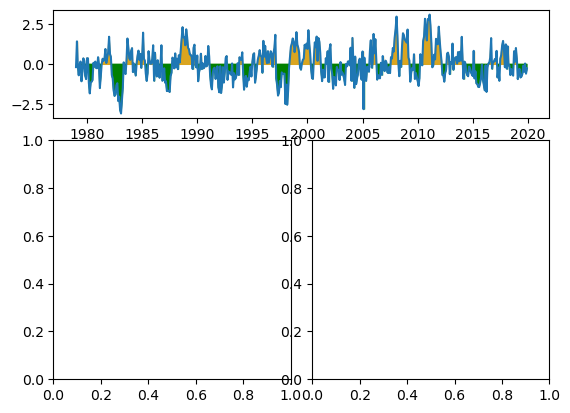

In [28]:
gs = gridspec.GridSpec(nrows = 3, ncols = 4)

fig=plt.figure()
ax1=fig.add_subplot(gs[0,:]) 
ax2=fig.add_subplot(gs[1:3,0:2]) 
ax3=fig.add_subplot(gs[1:3,2:])


ax1.plot(data.time, soi)
arr0 = np.zeros(len(soi))
ax1.fill_between(soi.time, arr0, soi, where=(soi>=0), color = 'goldenrod')
ax1.fill_between(soi.time, arr0, soi, where=(soi<=0), color = 'green')

soi_anom = soi - soi.mean()
soi_strong = data.where('soi_catergories' == 'strong_positive_SOI' , soi_anom)
# values = data.loc[data.soi_categories=='strong_positive_SOI', 'soi_anom']
# central_latitude=45,central_longitude=165)
# ax2.pcolormesh(data.longitude,data.latitude,,transform=ccrs.PlateCarree(),cmap=plt.cm.jet, shading='auto')
# ax2.plot(projection=ccrs.Mollweide())
# ax2.coastlines(color='k')

### Q2.2 Zonal mean temperature and winds

#### Q2.2.1 Compute the zonal mean temperature
A zonal mean is a mean in the longitudinal, or x-direction.

In [34]:
zonal_mean_temp = data.t.mean(dim='longitude')
zonal_mean_temp

<xarray.DataArray 't' (level: 32, latitude: 181)>
array([[-51.94031  , -51.9343   , -51.914936 , ..., -50.42182  ,
        -50.435482 , -50.439888 ],
       [-60.399593 , -60.389812 , -60.359005 , ..., -55.43444  ,
        -55.4468   , -55.449825 ],
       [-63.519413 , -63.509495 , -63.477703 , ..., -56.714832 ,
        -56.72882  , -56.733345 ],
       ...,
       [-25.885515 , -25.16904  , -23.683403 , ..., -13.968026 ,
        -14.003145 , -14.014375 ],
       [-24.677368 , -23.937685 , -22.446688 , ..., -14.181696 ,
        -14.212999 , -14.231506 ],
       [-23.486921 , -22.733925 , -21.236423 , ..., -13.948245 ,
        -13.9897375, -14.021514 ]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * level     (level) int32 10 20 30 50 70 100 125 ... 875 900 925 950 975 1000

#### Q2.2.2 Compute the zonal mean zonal wind (u)
The zonal wind is the wind in the longitudinal, or x-direction.

In [35]:
zonal_mean_wind = data.u.mean(dim='longitude')
zonal_mean_wind

<xarray.DataArray 'u' (level: 32, latitude: 181)>
array([[-2.6661018e-04,  1.2590815e+00,  2.5243335e+00, ...,
         1.5537872e+00,  7.7943242e-01, -2.6661018e-04],
       [-3.8367949e-04,  1.0974407e+00,  2.1997335e+00, ...,
         1.3890697e+00,  6.9815278e-01, -3.8367949e-04],
       [-3.6695524e-04,  9.6938920e-01,  1.9463623e+00, ...,
         1.2931013e+00,  6.5046436e-01, -3.6695524e-04],
       ...,
       [-4.6730042e-04, -4.4434208e-01, -2.0309050e+00, ...,
         1.0825764e-01,  3.4379408e-02, -4.6730042e-04],
       [-4.6730042e-04, -4.3425357e-01, -2.0290396e+00, ...,
         7.8630932e-02,  3.0276787e-02, -4.6730042e-04],
       [-4.6730042e-04, -4.4682303e-01, -2.0319140e+00, ...,
         3.8370367e-02,  3.7926568e-03, -4.6730042e-04]], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * level     (level) int32 10 20 30 50 70 100 125 ... 875 900 925 950 975 1000

#### Q2.2.3 Compute the meridional gradient of the zonal mean temperature
Take a look at [differentiate()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.differentiate.html). The meridional gradient is the gradient in the latitudinal, or y-direction. dT/dy should have units of ˚C/m, which means you need to convert latitude to meters. The radius of the Earth is 6371 km. 
><font color='green'><b>Hint:</b></font> If you've done the conversion correctly, the y-spacing (in meters) between each grid point should be exactly the same. Before you use differentiate, it may be easiest to create a new DataArray for your zonal mean temperature values that have level and your calculated y-values as the coordinates.

In [36]:
lat_m = data.latitude * 111139
grad = data.differentiate(zonal_mean_temp, lat_m)

TypeError: unhashable type: 'DataArray'

#### Q2.2.4 Plotting your zonal mean T, u, and dT/dy
Make a 2x1 plot of the following:
1. A filled contour plot of your zonal mean temperature (pressure on the y-axis and latitude on the x-axis) 
2. A filled contour plot of your meridional temperature gradient (pressure on the y-axis and latitude on the x-axis)

On both plots overlay unfilled contours of the zonal mean zonal wind. Make all of your unfilled contours the same color, but make the negative contours dashed lines and the positive contours solid lines

Additional plotting parameters:
1. Pressure should decrease with height for both plots
2. Use the same x-axis for both plots
3. Use different colormaps for each plot. Use the [chroma.js Color Palette Helper](https://vis4.net/palettes/#/9|s|00429d,96ffea,ffffe0|ffffe0,ff005e,93003a|1|1) to create a colorblind-friendly colormap for the first plot. You can also use [this color picker](http://tristen.ca/hcl-picker/#/hlc/12/1.09/461F24/DEB646) (or any other color picker you prefer), but you'll have to check on your own if your palette is colorblind-friendly. To create the colormap in matplotlib, use [ListedColormap()](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) from matplotlib.colors. For the second plot, you can use one of matplotlib's built-in colormaps.
4. Include colorbars for both plots
5. Include titles for your plots, labels for your colorbars, and label each plot's x- and y-axes. Include units where appropriate.
6. Set your x-axis ticks to go from 90˚S to 90˚N by 30˚
7. Make your x-axis ticklabels show latitude in ˚S and ˚N

### Q2.3 Time mean MSLP and wind vectors

#### Q2.3.1 Compute the time mean MSLP and extract u and v at 1000 mb

#### Q2.3.2 Compute the magnitude of the 1000 mb wind velocity vector

#### Q2.3.3 Plotting MSLP and velocity vectors
Make a filled contour plot of time mean MSLP with the 1000 mb wind velocity vectors overlaid. Check out [quiver()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) for plotting vectors.

Additional plotting parameters:
1. Make your wind vectors unit length
2. Do not plot a vector at every single point, as this will be exceedingly hard to see anything useful
3. Plot everything on a Robinson projection
4. Choose a colormap other than the default and contour levels that show your MSLP data clearly
5. Include a land outline on your plot
6. Include a title, label your colorbar, and include units
7. Change the default parameters for the arrow size and dimensions

><font color='red'><b>Note 1:</b></font> If you are getting a weird error about 2D boolean indexing not being supported when you try to subset your wind vectors, try using just the values with `.values`

><font color='red'><b>Note 2:</b></font> If you end up with a vertical white line in the middle of your plot, you need to [add a cyclic point](https://scitools.org.uk/cartopy/docs/v0.15/cartopy/util/util.html) (see the second example) to your data before plotting

><font color='red'><b>Note 3:</b></font> If you get a warning about vectors at source domain corners not being transformed correctly, you can ignore it for now

### Q2.4 Seasonal geopotential height anomalies

#### Q2.4.1 Compute the seasonal mean Southern Hemisphere 500 mb geopotential height anomalies
Only use data south of 40˚S. Compute anomalies relative to the full time mean of the data (1979-2020) rather than the 1979-2020 mean for each season.

#### Q2.4.2 Plot the seasonal Southern Hemisphere geopotential height anomalies
Make sure your plot adheres to the following parameters:
1. The subplots should be on a 2x2 grid
2. The subplots should use a cartopy south polar stereographic projection
3. Each subplot should have a title for the season it is showing. The overall plot should have a title as well. For all of the titles, use a font different from the default
4. Plot a single colorbar for the anomalies. This colorbar should be vertical, it should span the width of two of the subplots, and it should be on the right of the figure. It should have a label that includes the name of the variable and the units
5. Use a colormap that shows the anomalies clearly (do not use the default colormap), and choose an appropriate range for the contour levels
6. Add a land outline and gridlines to your subplots that are clearly distinguishable from the colors of your chosen colormap
7. Your plot should be large enough to tell what is going on in each subplot, and all titles and labels should be legible

><font color='blue'><b>Note 1:</b></font> If you want the bounding box of each subplot axis to be circular, check out [this example from cartopy](https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html)

><font color='red'><b>Note 2:</b></font> If you keep getting a warning about your font family not being found, this is because we only have standard linux fonts available on the jupyterhub. You can choose one of these standard fonts (you'll have to look up some linux fonts yourself and test them out; they won't all work), or you can leave things as is. As long as you demonstrate in your code that you provided the correct command to change the default font, you will get full points for that part of the problem, whether or not the font actually changes on your plot.